In [1]:
## Import necessary library
!pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
## Import dataset for use
df = pd.read_csv(r"C:\Users\USER\OneDrive\Dokumenty\TITANIC DATASET.csv")

In [29]:
## Checking the first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
## Checking the last 5 rows
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.6,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [31]:
## check the description of the dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.679428,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002075,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.600000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
## check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    float64
 1   pclass       891 non-null    float64
 2   sex          891 non-null    object 
 3   age          892 non-null    float64
 4   sibsp        891 non-null    float64
 5   parch        891 non-null    float64
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    object 
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    object 
dtypes: float64(6), object(9)
memory usage: 104.7+ KB


In [17]:
# overall survival rate:
survival_rate = df['survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

Overall survival rate: 38.38%


In [18]:
# Survival rate by sex
survival_by_sex = df.groupby('sex')['survived'].mean()
print("\nSurvival rate by sex:")
print(survival_by_sex)


Survival rate by sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [19]:
# Survival rate by class
survival_by_class = df.groupby('pclass')['survived'].mean()
print("\nSurvival rate by class:")
print(survival_by_class)


Survival rate by class:
pclass
1.0    0.629630
2.0    0.472826
3.0    0.242363
Name: survived, dtype: float64


In [20]:
## Gender distribution of passengers
gender_percent = df['sex'].value_counts(normalize=True) * 100
print("\nPassenger gender distribution (percentage):")
print(gender_percent.round(2))


Passenger gender distribution (percentage):
sex
male      64.76
female    35.24
Name: proportion, dtype: float64


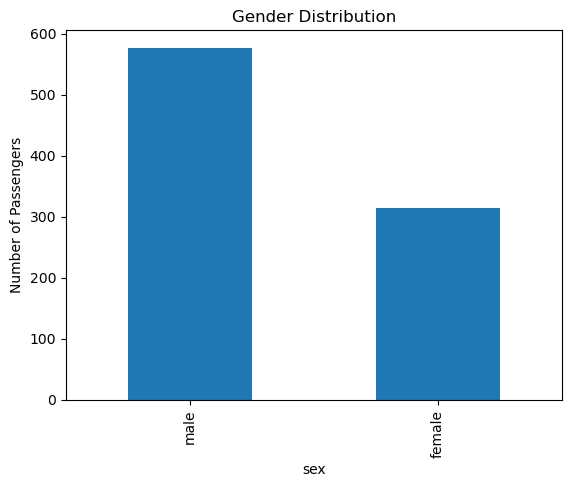

In [21]:
## Visualization of the gender distribution of passengers
df['sex'].value_counts().plot.bar(title='Gender Distribution')
plt.ylabel('Number of Passengers')
plt.show()

In [24]:
## passenger who embarks from each location
passenger_by_each_location = df['embark_town'].value_counts()
print("Passenger count by Town:")
print(passenger_by_each_location)

Passenger count by Town:
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


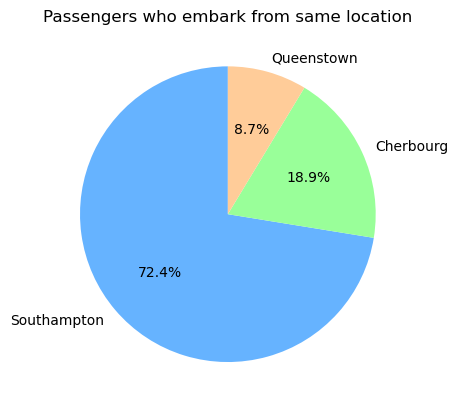

In [26]:
# Plot pie chart
passenger_by_each_location.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    title='Passengers who embark from same location',
    ylabel='',  
    colors=['#66b3ff','#99ff99','#ffcc99'] 
)

plt.show()

In [32]:
## Average fare paid by class
average_fare_by_class = df.groupby('class')['fare'].mean()
print("Average fare by passenger class:")
print(average_fare_by_class)

Average fare by passenger class:
class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64


C:\Temp\ipykernel_38584\2711905869.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_fare_by_class, x='class', y='fare', palette='pastel')


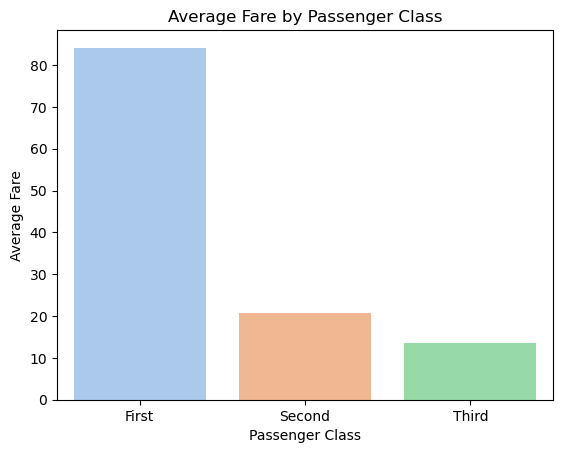

In [33]:
# plot barplot seaborn
average_fare_by_class = df.groupby('class')['fare'].mean().reset_index()

sns.barplot(data=average_fare_by_class, x='class', y='fare', palette='pastel')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()


In [39]:
## How gender affects survival rate
survival_by_gender = df.groupby('sex')['survived'].mean()
print("Survival rate by gender:")
print(survival_by_gender)

Survival rate by gender:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


C:\Temp\ipykernel_38584\1887562315.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='sex', y='survived', estimator='mean', ci=None, palette='pastel')
C:\Temp\ipykernel_38584\1887562315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='survived', estimator='mean', ci=None, palette='pastel')


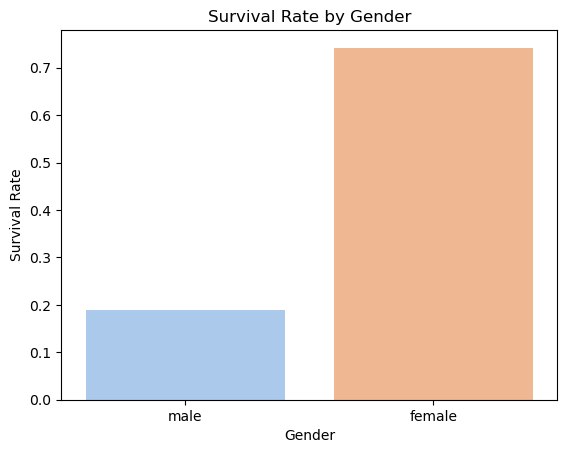

In [40]:
## visual repre
sns.barplot(data=df, x='sex', y='survived', estimator='mean', ci=None, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

In [42]:
# correlation between fare & survival
correlation = df['fare'].corr(df['survived'])
print(correlation)

0.2573065223849623


In [43]:
## How does the number of siblings/spouses affect survival
survival_by_sibsp = df.groupby('sibsp')['survived'].mean()
print("Survival rate Siblings/Spouses:")
print(survival_by_sibsp)

Survival rate Siblings/Spouses:
sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


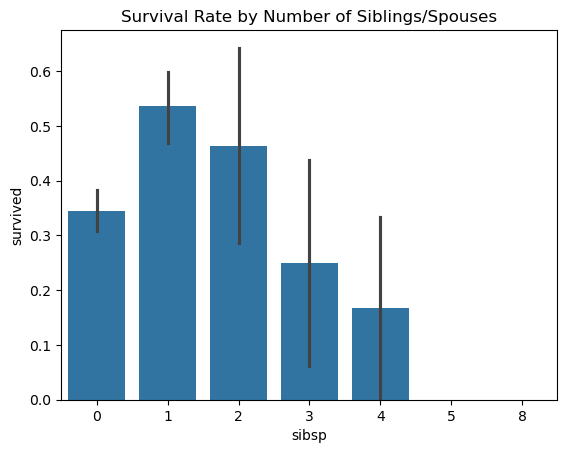

In [44]:
## survival by sibsp
sns.barplot(x='sibsp', y='survived', data=df)
plt.title('Survival Rate by Number of Siblings/Spouses')
plt.show()

C:\Temp\ipykernel_38584\600996146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='age', data=df, palette='Set2')


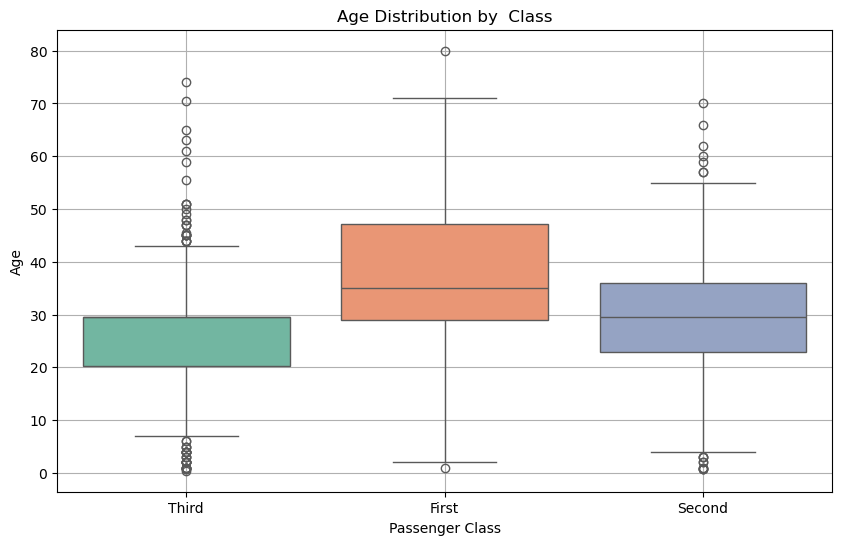

In [46]:
# Boxplot of Age distribution by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=df, palette='Set2')
plt.title('Age Distribution by  Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.grid(True)
plt.show()

In [48]:
# Group by embarkation point
survival_by_embarked = df.groupby('embarked')['survived'].mean().reset_index()

# Display as percentages
survival_by_embarked['Survival Rate (%)'] = survival_by_embarked['survived'] * 100
print(survival_by_embarked[['embarked', 'Survival Rate (%)']])

  embarked  Survival Rate (%)
0        C          55.357143
1        Q          38.961039
2        S          33.695652


C:\Temp\ipykernel_38584\2176758972.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parch', y='survival Rate (%)', data=parch_survival, palette='coolwarm')


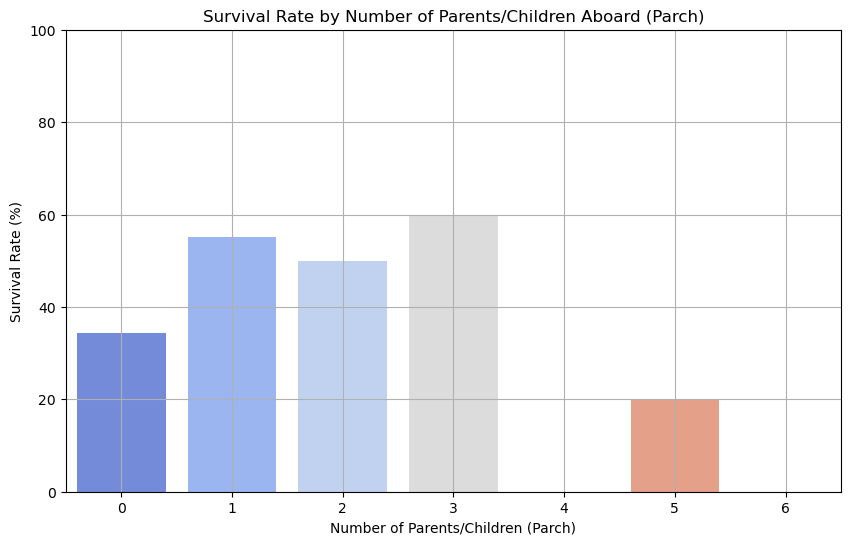

In [52]:
# Group and calculate survival rate by parch
parch_survival = df.groupby('parch')['survived'].mean().reset_index()
parch_survival['survival Rate (%)'] = parch_survival['survived'] * 100
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='parch', y='survival Rate (%)', data=parch_survival, palette='coolwarm')

plt.title('Survival Rate by Number of Parents/Children Aboard (Parch)')
plt.xlabel('Number of Parents/Children (Parch)')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.grid(True)
plt.show()